# Задачи на 4
## Геом. моделирование
### 1. Найти аффинное преобразование F, переводящее:
1. единичный куб, вписанный в I октант в косой параллелепипед с заданной вершиной O'= F(0) (O' != O), заданной диагональю d и основанием в плоскости Oyz
2. Тетраэдр, отсекающий единичные отрезки на осях, в правильную пирамиду с заданным ребром, центром в точке O' != 0 и основанием Oxy
### 2. Построить поверхность Безье (на свой выбор)
## Геом. поиск
### 3. Найти крайние точки в мн-ве $P_1, P_2,... P_{10} (R^3)$
### 4. Построить евклидово минимальное остовное дерево для N точек на плоскостях (дерево с вершинами в заданных точках и минимальной суммой длин ребер)

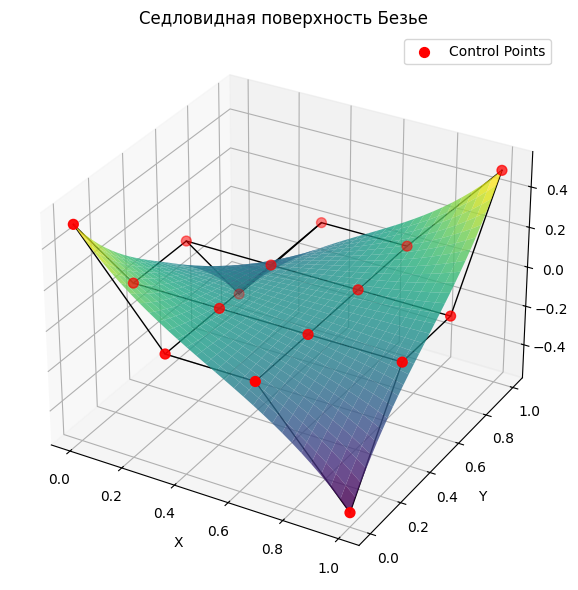

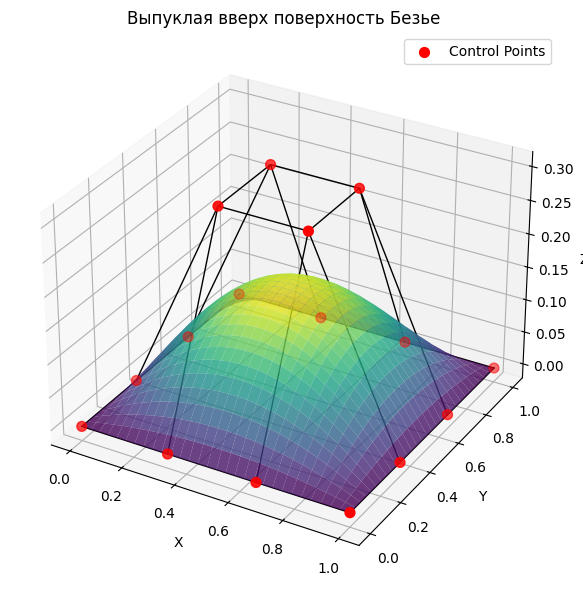

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

def binome(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

def bernstein(n, k, t):
    return binome(n, k) * t**k * (1 - t)**(n - k)

def bezier_surface(control_points, u, v):
    degree_u = control_points.shape[0] - 1
    degree_v = control_points.shape[1] - 1
    surface = np.zeros(u.shape + (3,), dtype=np.float64)
    for i in range(degree_u + 1):
        for j in range(degree_v + 1):
            b_i = bernstein(degree_u, i, u)
            b_j = bernstein(degree_v, j, v)
            coeff = (b_i * b_j)[:, :, None]
            surface += coeff * control_points[i, j]
    return surface

def plot_surface_with_control_points(control_points, title):
    n = 30
    u = np.linspace(0, 1, n)
    v = np.linspace(0, 1, n)
    u_grid, v_grid = np.meshgrid(u, v)
    surface = bezier_surface(control_points, u_grid, v_grid)
    X = surface[..., 0]
    Y = surface[..., 1]
    Z = surface[..., 2]

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

    cp = control_points.reshape(-1, 3)
    ax.scatter(cp[:, 0], cp[:, 1], cp[:, 2], color='red', s=50, label='Control Points')

    for i in range(control_points.shape[0]):
        ax.plot(control_points[i, :, 0], control_points[i, :, 1], control_points[i, :, 2], color='black', linewidth=1)
    for j in range(control_points.shape[1]):
        ax.plot(control_points[:, j, 0], control_points[:, j, 1], control_points[:, j, 2], color='black', linewidth=1)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()
    plt.tight_layout()
    plt.show()

control_points_saddle = np.array([
    [[0.0, 0.0,  0.5], [0.0, 0.33,  0.0], [0.0, 0.66,  0.0], [0.0, 1.0, -0.5]],
    [[0.33, 0.0,  0.0], [0.33, 0.33,  0.0], [0.33, 0.66,  0.0], [0.33, 1.0,  0.0]],
    [[0.66, 0.0,  0.0], [0.66, 0.33,  0.0], [0.66, 0.66,  0.0], [0.66, 1.0,  0.0]],
    [[1.0, 0.0, -0.5], [1.0, 0.33,  0.0], [1.0, 0.66,  0.0], [1.0, 1.0,  0.5]]
])
plot_surface_with_control_points(control_points_saddle, "Седловидная поверхность Безье")

control_points_convex = np.array([
    [[0.0, 0.0, 0.0], [0.0, 0.33, 0.0], [0.0, 0.66, 0.0], [0.0, 1.0, 0.0]],
    [[0.33, 0.0, 0.0], [0.33, 0.33, 0.3], [0.33, 0.66, 0.3], [0.33, 1.0, 0.0]],
    [[0.66, 0.0, 0.0], [0.66, 0.33, 0.3], [0.66, 0.66, 0.3], [0.66, 1.0, 0.0]],
    [[1.0, 0.0, 0.0], [1.0, 0.33, 0.0], [1.0, 0.66, 0.0], [1.0, 1.0, 0.0]]
])
plot_surface_with_control_points(control_points_convex, "Выпуклая вверх поверхность Безье")


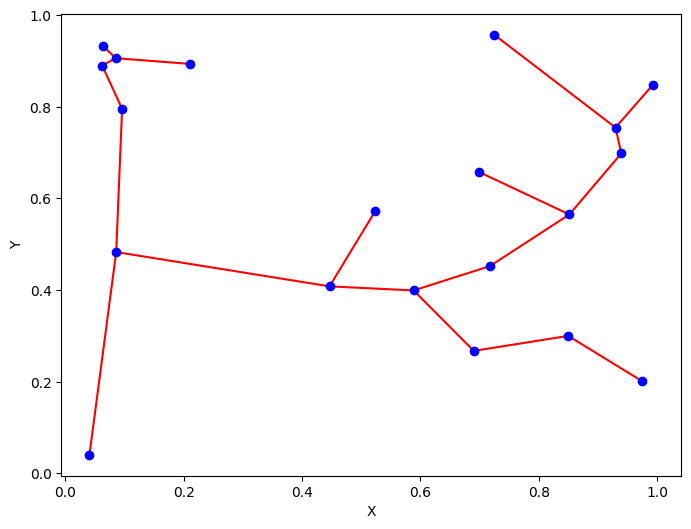

In [7]:
import random
import math
import matplotlib.pyplot as plt

def generate_points(n, x_lim=(0, 1), y_lim=(0, 1)):
    points = [(random.uniform(*x_lim), random.uniform(*y_lim)) for _ in range(n)]
    return points

def euclidean_distance(p, q):
    return math.hypot(p[0] - q[0], p[1] - q[1])

def find(parent, i):
    if parent[i] != i:
        parent[i] = find(parent, parent[i])
    return parent[i]

def union(parent, i, j):
    root_i = find(parent, i)
    root_j = find(parent, j)
    if root_i != root_j:
        parent[root_j] = root_i

def kruskal(points):
    n = len(points)
    edges = []
    for i in range(n):
        for j in range(i+1, n):
            d = euclidean_distance(points[i], points[j])
            edges.append((d, i, j))

    edges.sort(key=lambda x: x[0])

    parent = list(range(n))
    mst_edges = []

    for edge in edges:
        d, i, j = edge
        if find(parent, i) != find(parent, j):
            union(parent, i, j)
            mst_edges.append(edge)

            if len(mst_edges) == n - 1:
                break
    return mst_edges

def plot_mst(points, mst_edges):
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]

    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='blue', zorder=2)

    for d, i, j in mst_edges:
        x_line = [points[i][0], points[j][0]]
        y_line = [points[i][1], points[j][1]]
        plt.plot(x_line, y_line, color='red', zorder=1)

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

N = 20
points = generate_points(N)
mst_edges = kruskal(points)
plot_mst(points, mst_edges)


In [11]:
import numpy as np
import random

def cross(a, b):
    return np.cross(a, b)

def norm(a):
    return np.linalg.norm(a)

def normalize(a):
    n = norm(a)
    if n == 0:
        return a
    return a / n

def plane_from_points(a, b, c):
    n = cross(b - a, c - a)
    n = normalize(n)
    d = -np.dot(n, a)
    return n, d

def point_plane_distance(p, n, d):
    return np.dot(n, p) + d

class Face:
    def __init__(self, a, b, c, points):
        self.vertices = (a, b, c)
        self.points = points
        self.n, self.d = plane_from_points(points[a], points[b], points[c])
        self.outside_points = set()
        self.visible = False

    def is_point_above(self, idx):
        return point_plane_distance(self.points[idx], self.n, self.d) > 1e-8

    def __contains__(self, idx):
        return idx in self.vertices

    def edges(self):
        a, b, c = self.vertices
        return [(a, b), (b, c), (c, a)]

def find_initial_tetrahedron(points):
    n = len(points)

    # 1. Находим отрезок ab - самый длинный
    max_dist = 0
    idx = (0, 1)
    for i in range(n):
        for j in range(i+1, n):
            d = norm(points[i] - points[j])
            if d > max_dist:
                max_dist = d
                idx = (i, j)
    a, b = idx

    # 2. Найти точку, наиболее удалённую от отрезка ab
    ab = points[b] - points[a]
    ab = normalize(ab)
    max_dist = 0
    c = None
    for i in range(n):
        if i == a or i == b:
            continue
        ap = points[i] - points[a]
        dist = norm(ap - np.dot(ap, ab) * ab)
        if dist > max_dist:
            max_dist = dist
            c = i

    # 3. Найти точку, наиболее удалённую от плоскости abc
    nrm, d_plane = plane_from_points(points[a], points[b], points[c])
    max_dist = 0
    d_idx = None
    for i in range(n):
        if i in (a, b, c):
            continue
        dist = abs(point_plane_distance(points[i], nrm, d_plane))
        if dist > max_dist:
            max_dist = dist
            d_idx = i

    if d_idx is None:
        raise ValueError("Все точки лежат в одной плоскости или на одной прямой.")

    return [a, b, c, d_idx]

def face_orientation(face, fourth_idx, points):
    # Проверяем, чтобы нормаль была наружу
    n, d = plane_from_points(points[face[0]], points[face[1]], points[face[2]])
    if point_plane_distance(points[fourth_idx], n, d) > 0:
        # Меняем порядок, чтобы нормаль была наружу
        return (face[0], face[2], face[1])
    return face

def build_initial_hull(points, tetra):
    a, b, c, d = tetra
    faces_idx = [
        (a, b, c),
        (a, c, d),
        (a, d, b),
        (b, d, c)
    ]
    oriented_faces = []
    for face in faces_idx:
        fourth = list(set(tetra) - set(face))[0]
        oriented_faces.append(face_orientation(face, fourth, points))
    return [Face(*face, points) for face in oriented_faces]

def add_point_to_hull(point_idx, faces, points):
    # 1. Найти все грани, видимые из точки (скалярное произведение вектора нормали на вектор из любой точки грани к добавляемой точке положительно)
    visible_faces = []
    for face in faces:
        if face.is_point_above(point_idx):
            face.visible = True
            visible_faces.append(face)
        else:
            face.visible = False

    # 2. Найти горизонт (ребра, принадлежащие только одной видимой грани)
    horizon = []
    edge_count = {}
    for face in visible_faces:
        for e in face.edges():
            e_sorted = tuple(sorted(e))
            edge_count[e_sorted] = edge_count.get(e_sorted, 0) + 1
    for face in visible_faces:
        for e in face.edges():
            e_sorted = tuple(sorted(e))
            if edge_count[e_sorted] == 1:
                # Это граничное ребро (horizon)
                # Важно сохранить порядок (от и до)
                horizon.append(e)

    # 3. Удалить видимые грани
    faces = [f for f in faces if not f.visible]

    # 4. Добавить новые грани из точки к горизонту
    for e in horizon:
        # Ориентируем грань наружу
        new_face = Face(e[0], e[1], point_idx, points)
        # Проверим, что нормаль наружу (центр оболочки внутри)
        hull_pts = np.array([points[v] for f in faces for v in f.vertices] + [points[point_idx]])
        center = np.mean(hull_pts, axis=0)
        if point_plane_distance(center, new_face.n, new_face.d) > 0:
            # Меняем порядок
            new_face = Face(e[1], e[0], point_idx, points)
        faces.append(new_face)
    return faces

def is_point_inside_hull(point_idx, faces):
    for face in faces:
        if face.is_point_above(point_idx):
            return False
    return True

def convex_hull_3d(points):
    points = np.array(points)
    n = len(points)
    if n < 4:
        return list(range(n)), []

    # 1. Построить начальный тетраэдр
    tetra = find_initial_tetrahedron(points)
    used = set(tetra)
    faces = build_initial_hull(points, tetra)

    # 2. Перемешать оставшиеся точки
    rest = [i for i in range(n) if i not in used]
    random.shuffle(rest)

    # 3. Инкрементально добавлять точки
    for idx in rest:
        if is_point_inside_hull(idx, faces, points):
            continue
        faces = add_point_to_hull(idx, faces, points)

    # Собрать все уникальные вершины и грани
    hull_vertices = set()
    hull_faces = []
    for face in faces:
        hull_faces.append(face.vertices)
        hull_vertices.update(face.vertices)
    return list(hull_vertices), hull_faces

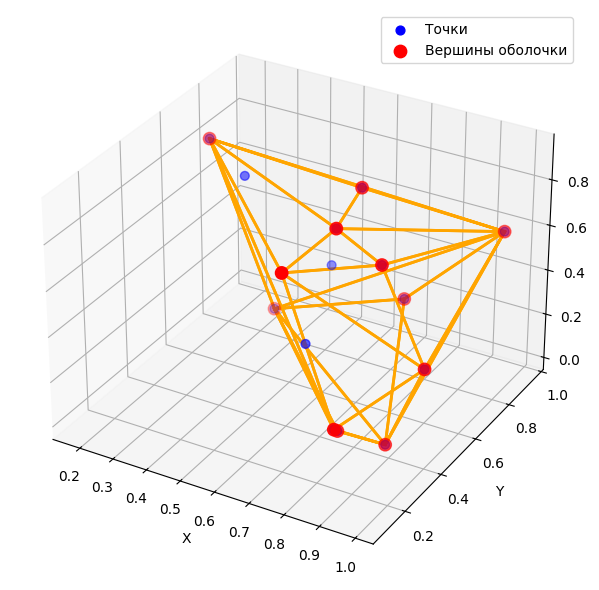

Вершины выпуклой оболочки: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12]
Координаты вершин выпуклой оболочки:
[0.31897563 0.84487531 0.02327194]
[0.81446848 0.28185477 0.11816483]
[0.69673717 0.62894285 0.87747201]
[0.73507104 0.80348093 0.28203457]
[0.17743954 0.75061475 0.80683474]
[0.99050514 0.41261768 0.37201809]
[0.77641296 0.34080354 0.93075733]
[0.85841275 0.42899403 0.75087107]
[0.75454287 0.10312387 0.90255291]
[0.89552323 0.38920168 0.01083765]
[0.90538198 0.09128668 0.31931364]
[0.95006197 0.95060715 0.57343789]
Грани:
(0, 4, 12)
(0, 12, 3)
(12, 4, 2)
(8, 4, 11)
(4, 0, 11)
(5, 8, 11)
(12, 5, 10)
(3, 12, 10)
(0, 3, 10)
(5, 11, 10)
(12, 2, 6)
(4, 8, 6)
(2, 4, 6)
(11, 0, 1)
(0, 10, 1)
(10, 11, 1)
(8, 5, 7)
(6, 8, 7)
(5, 12, 7)
(12, 6, 7)


In [17]:
def plot_convex_hull(points, hull_vertices, hull_faces):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")

    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color="blue", s=40, label="Точки")

    hull_vertices = list(set(hull_vertices))
    ax.scatter(points[hull_vertices, 0], points[hull_vertices, 1], points[hull_vertices, 2], color="red", s=80, label="Вершины оболочки")

    for face in hull_faces:
        idx = list(face) + [face[0]]
        ax.plot(points[idx, 0], points[idx, 1], points[idx, 2], color="orange", linewidth=2)

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    plt.tight_layout()
    plt.show()

points = np.random.rand(15, 3)
hull_vertices, hull_faces = convex_hull_3d(points)
plot_convex_hull(points, hull_vertices, hull_faces)

print("Вершины выпуклой оболочки:", hull_vertices)
print("Координаты вершин выпуклой оболочки:")
for idx in hull_vertices:
    print(points[idx])
print("Грани:")
for f in hull_faces:
    print(f)